# 고객의 채무 불이행 여부 분류
---
#### 데이터 양
- train : 100,000 개
- test : 35,815 개
---
#### input과 output
- input : 고객 재무 상태에 대한 75개 feature
- output : 채무 불이행 여부
    - 0 = 이행
    - 1 = 불이행 / 부도
---
#### features
- **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
- **annual_inc** : 연 소득 (annual income)
- **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
- **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
- **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
- **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
- **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
- **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
- **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
- **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
- **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
- **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
- **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
- **delinq_amnt** : 체납 금액 (delinquency amount)
- **tax_liens** : 세금 저당권의 수 (Number of tax liens)
- **emp_length1** ~ 12 : 고용 연수 (Number of years in the job)
- **home_ownership1** ~ 6 : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
- **verification_status1** ~ 3 : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
- **purpose1** ~ 14 : 대출 목적 (The purpose of the loan)
- **initial_list_status1** ~ 2 : 최초 대출 상태 (Initial listing status of the loan)
- **mths_since_last_delinq1** ~ 11 : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
- **funded_amnt** : 대출액 (Funded amount)
- **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
- **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
- **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
- **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
- **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
- **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
- **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
- **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
- **total_rec_int** : 이자 상환액 (Interest received to date)
- **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrowerʼs FICO at loan origination belongs to)
- **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrowerʼs FICO at loan origination belongs to)
- **depvar** : 고객의 부도 여부 (dependent variable)

---
# 필요 데이터 로드
---

In [22]:
# Libraries for data handling
import numpy as np
import pandas as pd

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for machin learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

In [23]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [24]:
print(train.shape)
print(train.columns.values)
train.describe().T

(100000, 76)
['int_rate' 'annual_inc' 'dti' 'delinq_2yrs' 'inq_last_6mths' 'pub_rec'
 'revol_bal' 'total_acc' 'collections_12_mths_ex_med' 'acc_now_delinq'
 'tot_coll_amt' 'tot_cur_bal' 'chargeoff_within_12_mths' 'delinq_amnt'
 'tax_liens' 'emp_length1' 'emp_length2' 'emp_length3' 'emp_length4'
 'emp_length5' 'emp_length6' 'emp_length7' 'emp_length8' 'emp_length9'
 'emp_length10' 'emp_length11' 'emp_length12' 'home_ownership1'
 'home_ownership2' 'home_ownership3' 'home_ownership4' 'home_ownership5'
 'home_ownership6' 'verification_status1' 'verification_status2'
 'verification_status3' 'purpose1' 'purpose2' 'purpose3' 'purpose4'
 'purpose5' 'purpose6' 'purpose7' 'purpose8' 'purpose9' 'purpose10'
 'purpose11' 'purpose12' 'purpose13' 'purpose14' 'initial_list_status1'
 'initial_list_status2' 'mths_since_last_delinq1'
 'mths_since_last_delinq2' 'mths_since_last_delinq3'
 'mths_since_last_delinq4' 'mths_since_last_delinq5'
 'mths_since_last_delinq6' 'mths_since_last_delinq7'
 'mths_since_l

,count,mean,std,min,25%,50%,75%,max
int_rate,100000.0,0.130833,0.044773,0.0532,0.0975,0.1274,0.158,3.099000e-01
annual_inc,100000.0,74360.611480,74674.089245,5360.0000,45000.0000,62000.0000,90000.000,8.300000e+06
dti,100000.0,18.514508,8.413049,0.0000,12.2000,18.0600,24.530,4.993000e+01
delinq_2yrs,100000.0,0.343700,0.905007,0.0000,0.0000,0.0000,0.000,2.000000e+01
inq_last_6mths,100000.0,0.668880,0.952044,0.0000,0.0000,0.0000,1.000,6.000000e+00
...,...,...,...,...,...,...,...,...
out_prncp_inv,100000.0,0.253259,18.051746,0.0000,0.0000,0.0000,0.000,2.330970e+03
total_rec_int,100000.0,2491.282802,2706.262200,0.0000,857.2925,1615.1600,3039.115,2.800596e+04
fico_range_low,100000.0,692.630550,29.668017,660.0000,670.0000,685.0000,705.000,8.450000e+02
fico_range_high,100000.0,696.630660,29.668584,664.0000,674.0000,689.0000,709.000,8.500000e+02


# 시각화

In [25]:
train.depvar.sum()/len(train)

0.32569

Text(0.5, 1.0, 'Correlation Heatmap')

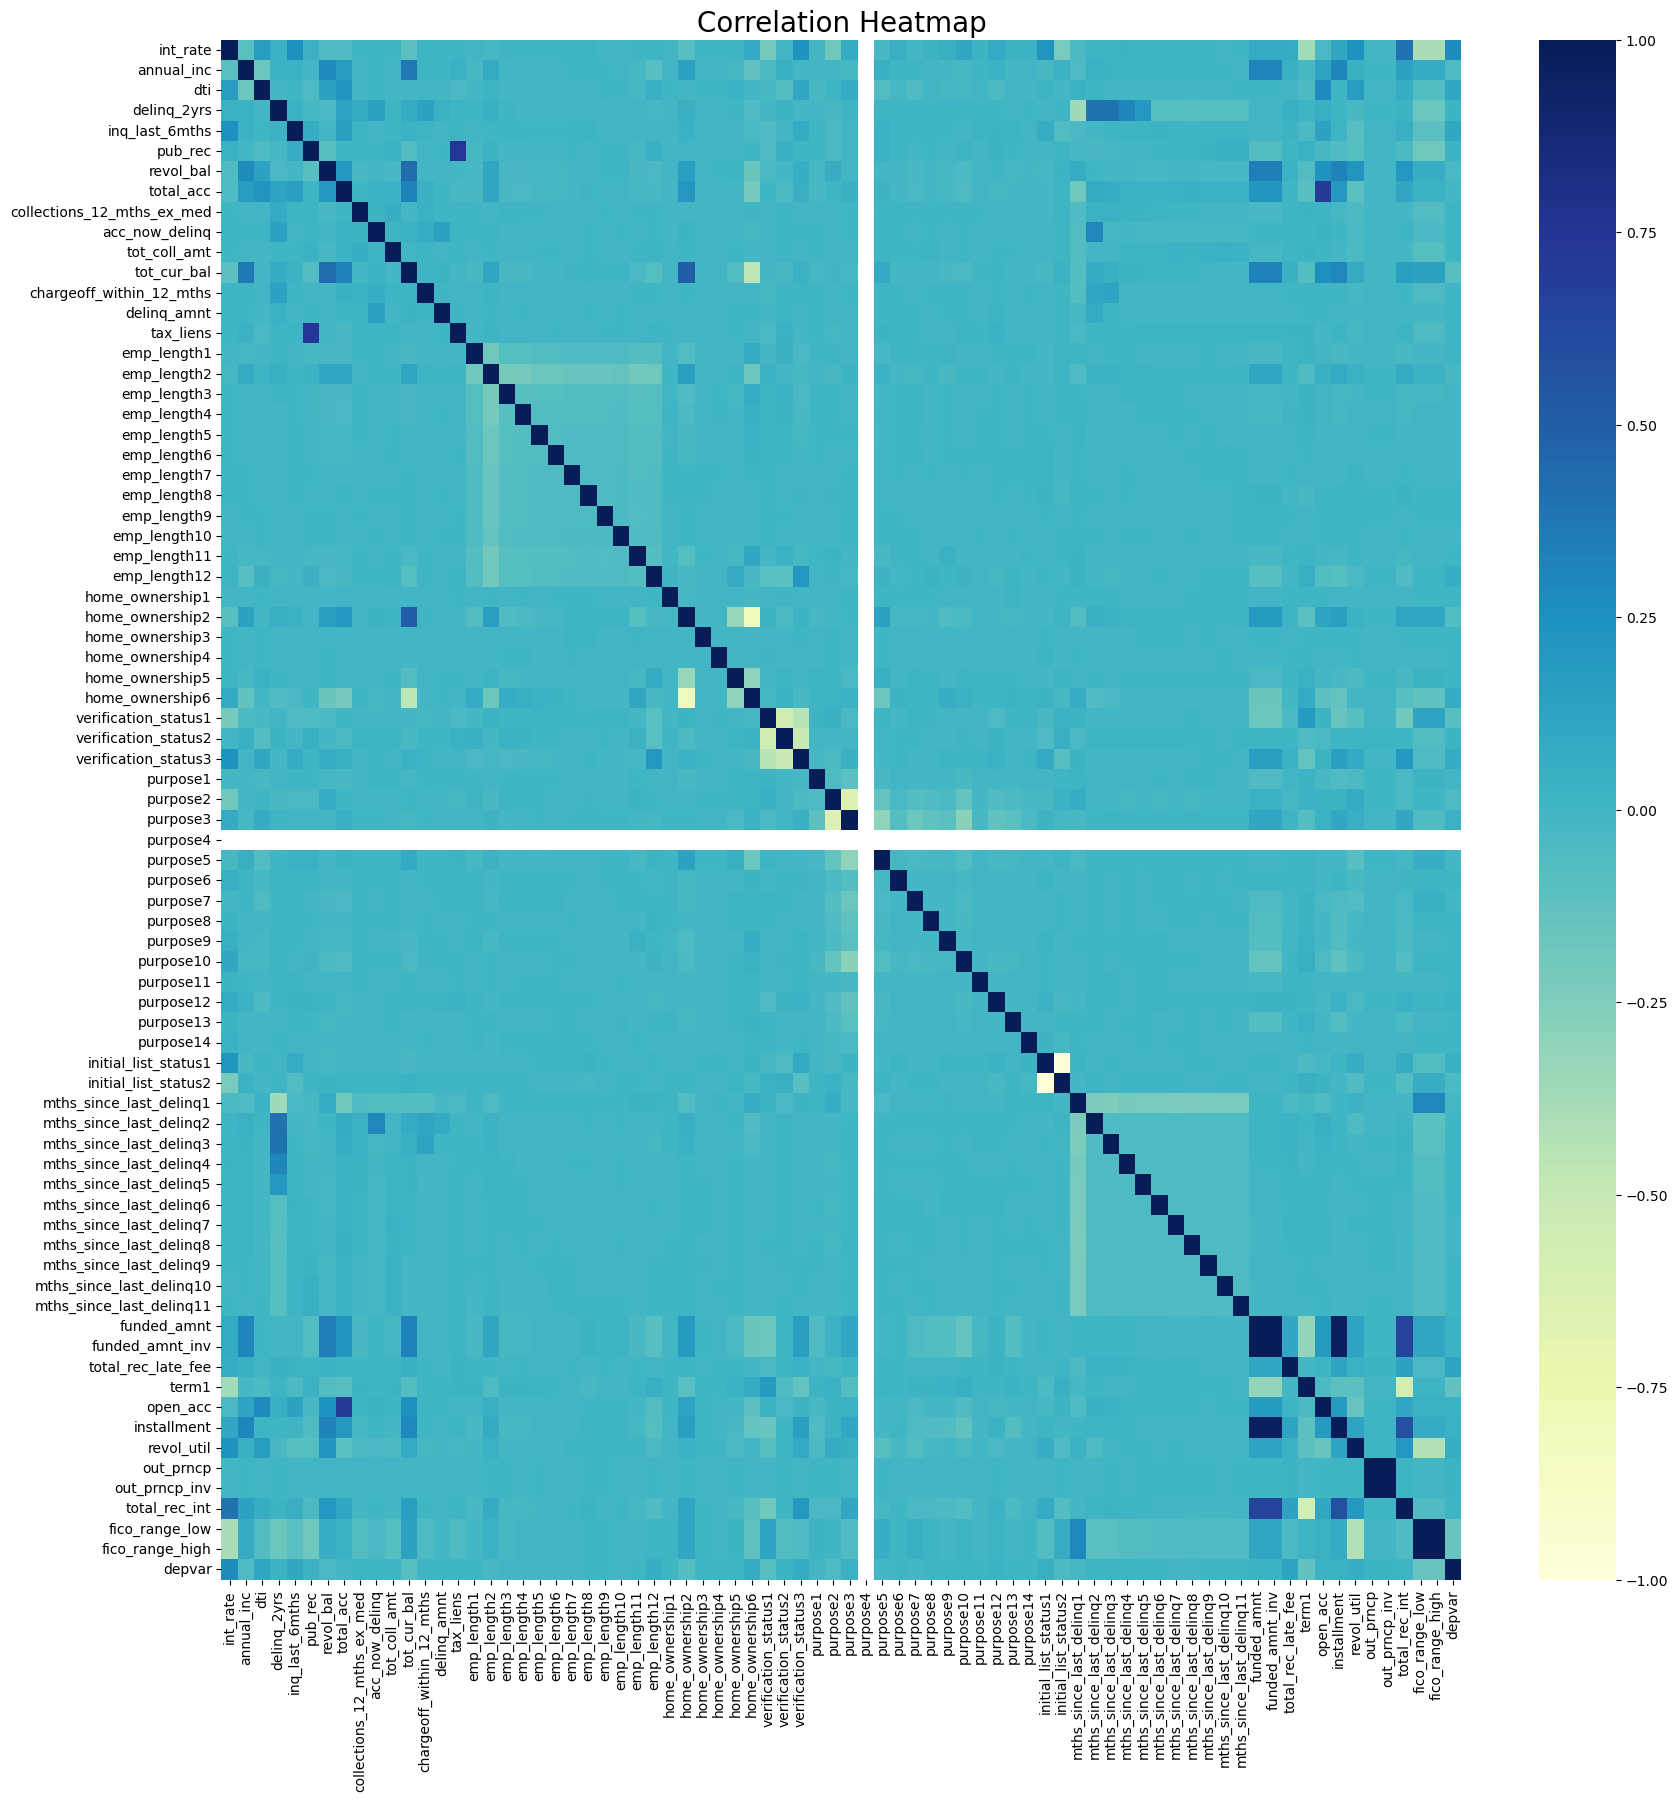

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), cmap='YlGnBu')
plt.title('Correlation Heatmap', fontsize=20)

In [27]:
train.corr()['depvar']

int_rate           0.277944
annual_inc        -0.056885
dti                0.110809
delinq_2yrs        0.021292
inq_last_6mths     0.096474
                     ...   
out_prncp_inv      0.020187
total_rec_int      0.013784
fico_range_low    -0.155840
fico_range_high   -0.155840
depvar             1.000000
Name: depvar, Length: 76, dtype: float64

int_rate              Axes(0.125,0.836742;0.133621x0.0432584)
annual_inc         Axes(0.285345,0.836742;0.133621x0.0432584)
dti                 Axes(0.44569,0.836742;0.133621x0.0432584)
delinq_2yrs        Axes(0.606034,0.836742;0.133621x0.0432584)
inq_last_6mths     Axes(0.766379,0.836742;0.133621x0.0432584)
                                      ...                    
out_prncp                 Axes(0.125,0.11;0.133621x0.0432584)
out_prncp_inv          Axes(0.285345,0.11;0.133621x0.0432584)
total_rec_int           Axes(0.44569,0.11;0.133621x0.0432584)
fico_range_low         Axes(0.606034,0.11;0.133621x0.0432584)
fico_range_high        Axes(0.766379,0.11;0.133621x0.0432584)
Length: 75, dtype: object

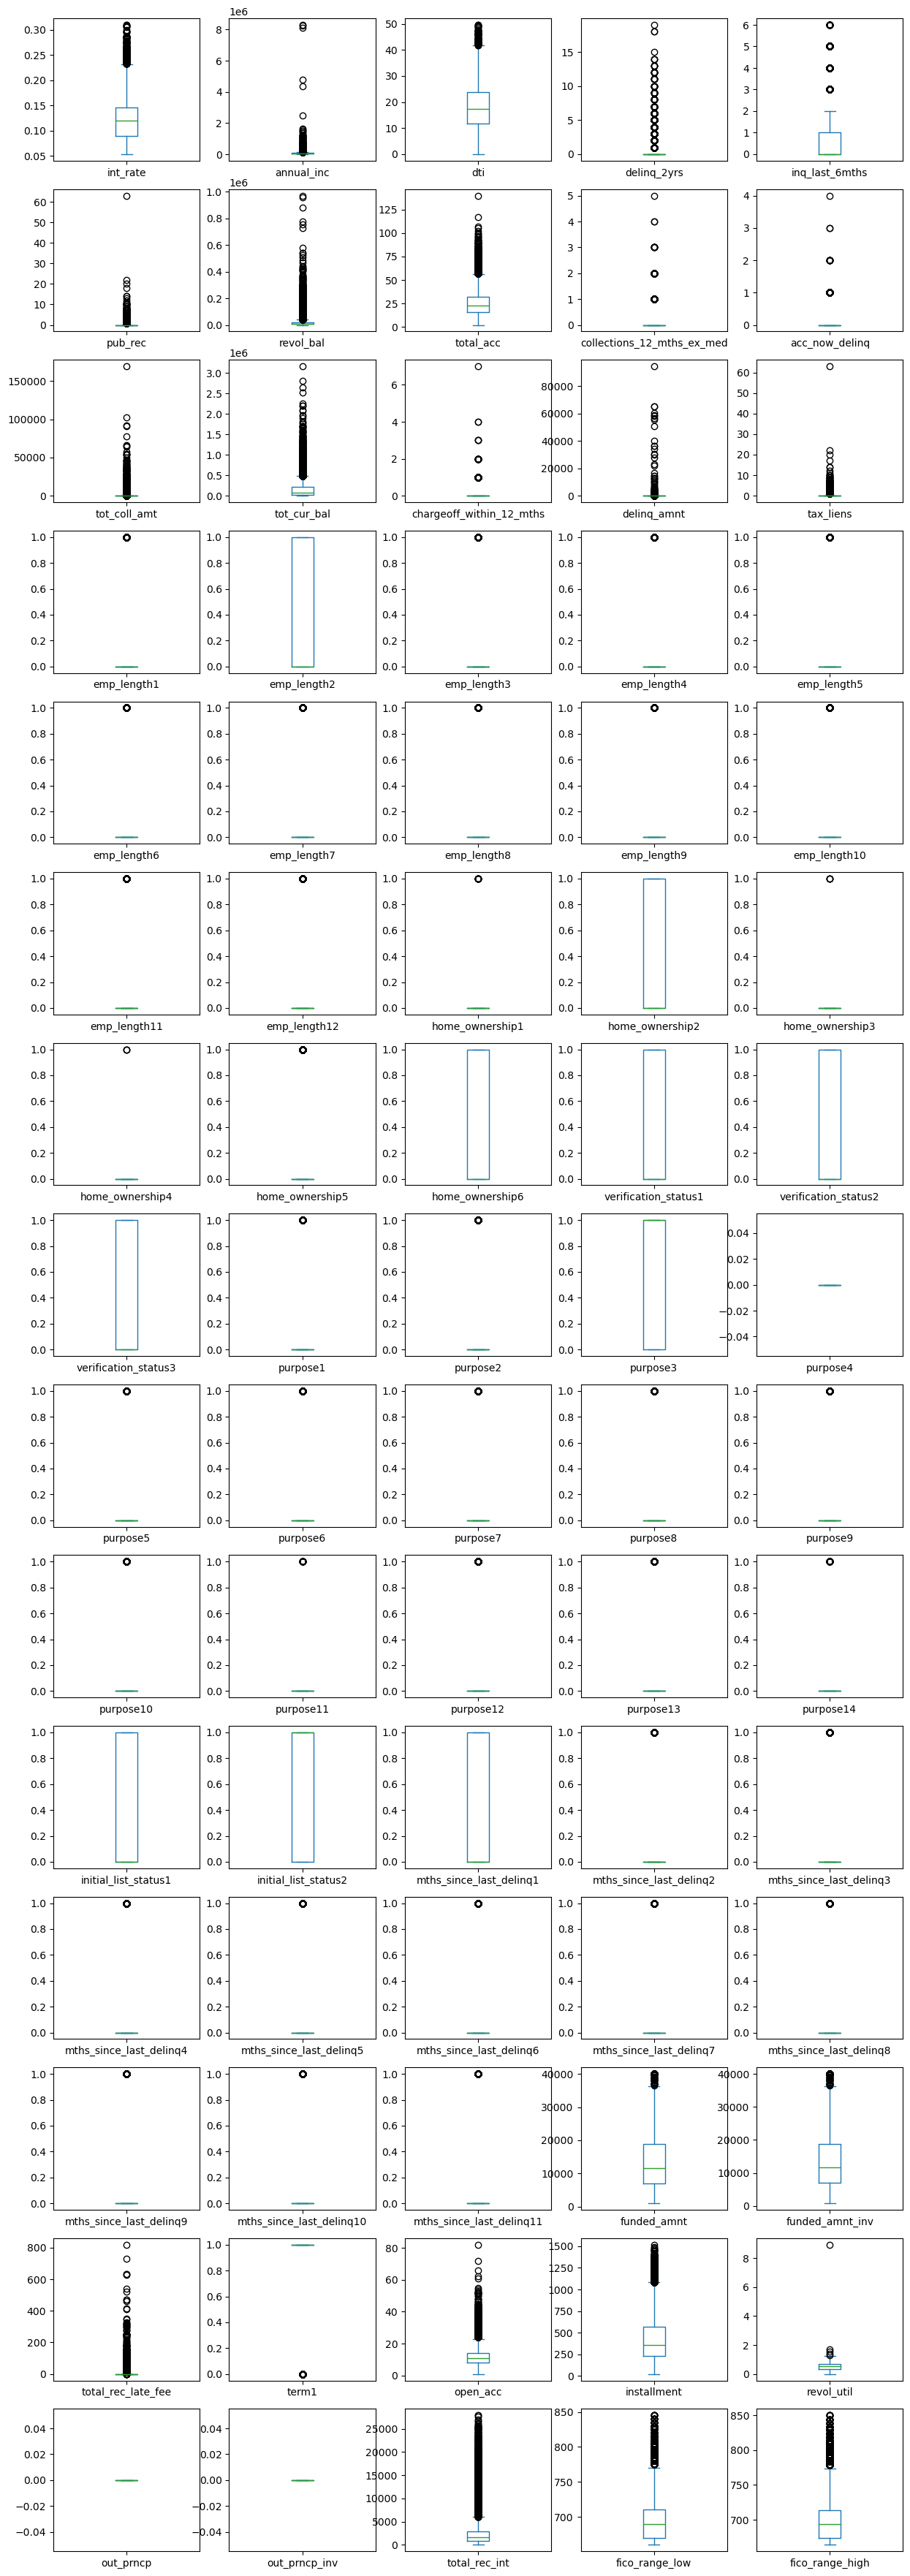

In [28]:
train[train['depvar']==0].drop('depvar', axis=1).plot(kind='box', \
                                subplots=True, layout=(15, 5), figsize=(15, 45))

/var/folders/3h/jprthrkx73n0d9pl0mgr0kqm0000gn/T/ipykernel_93453/2939202802.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(depvar_false, ax=ax, color='blue')
/var/folders/3h/jprthrkx73n0d9pl0mgr0kqm0000gn/T/ipykernel_93453/2939202802.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(depvar_true, ax=ax, color='red')
/var/folders/3h/jprthrkx73n0d9pl0mgr0kqm0000gn/T/ipykernel_93453/2939202802.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(depvar_false, ax=ax, color='blue')
/var/folders/3h/jprthrkx73n0d9pl0mgr0kqm0000gn/T/ipykernel_93453/2939202802.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(depvar_false, ax=ax, color='blue')


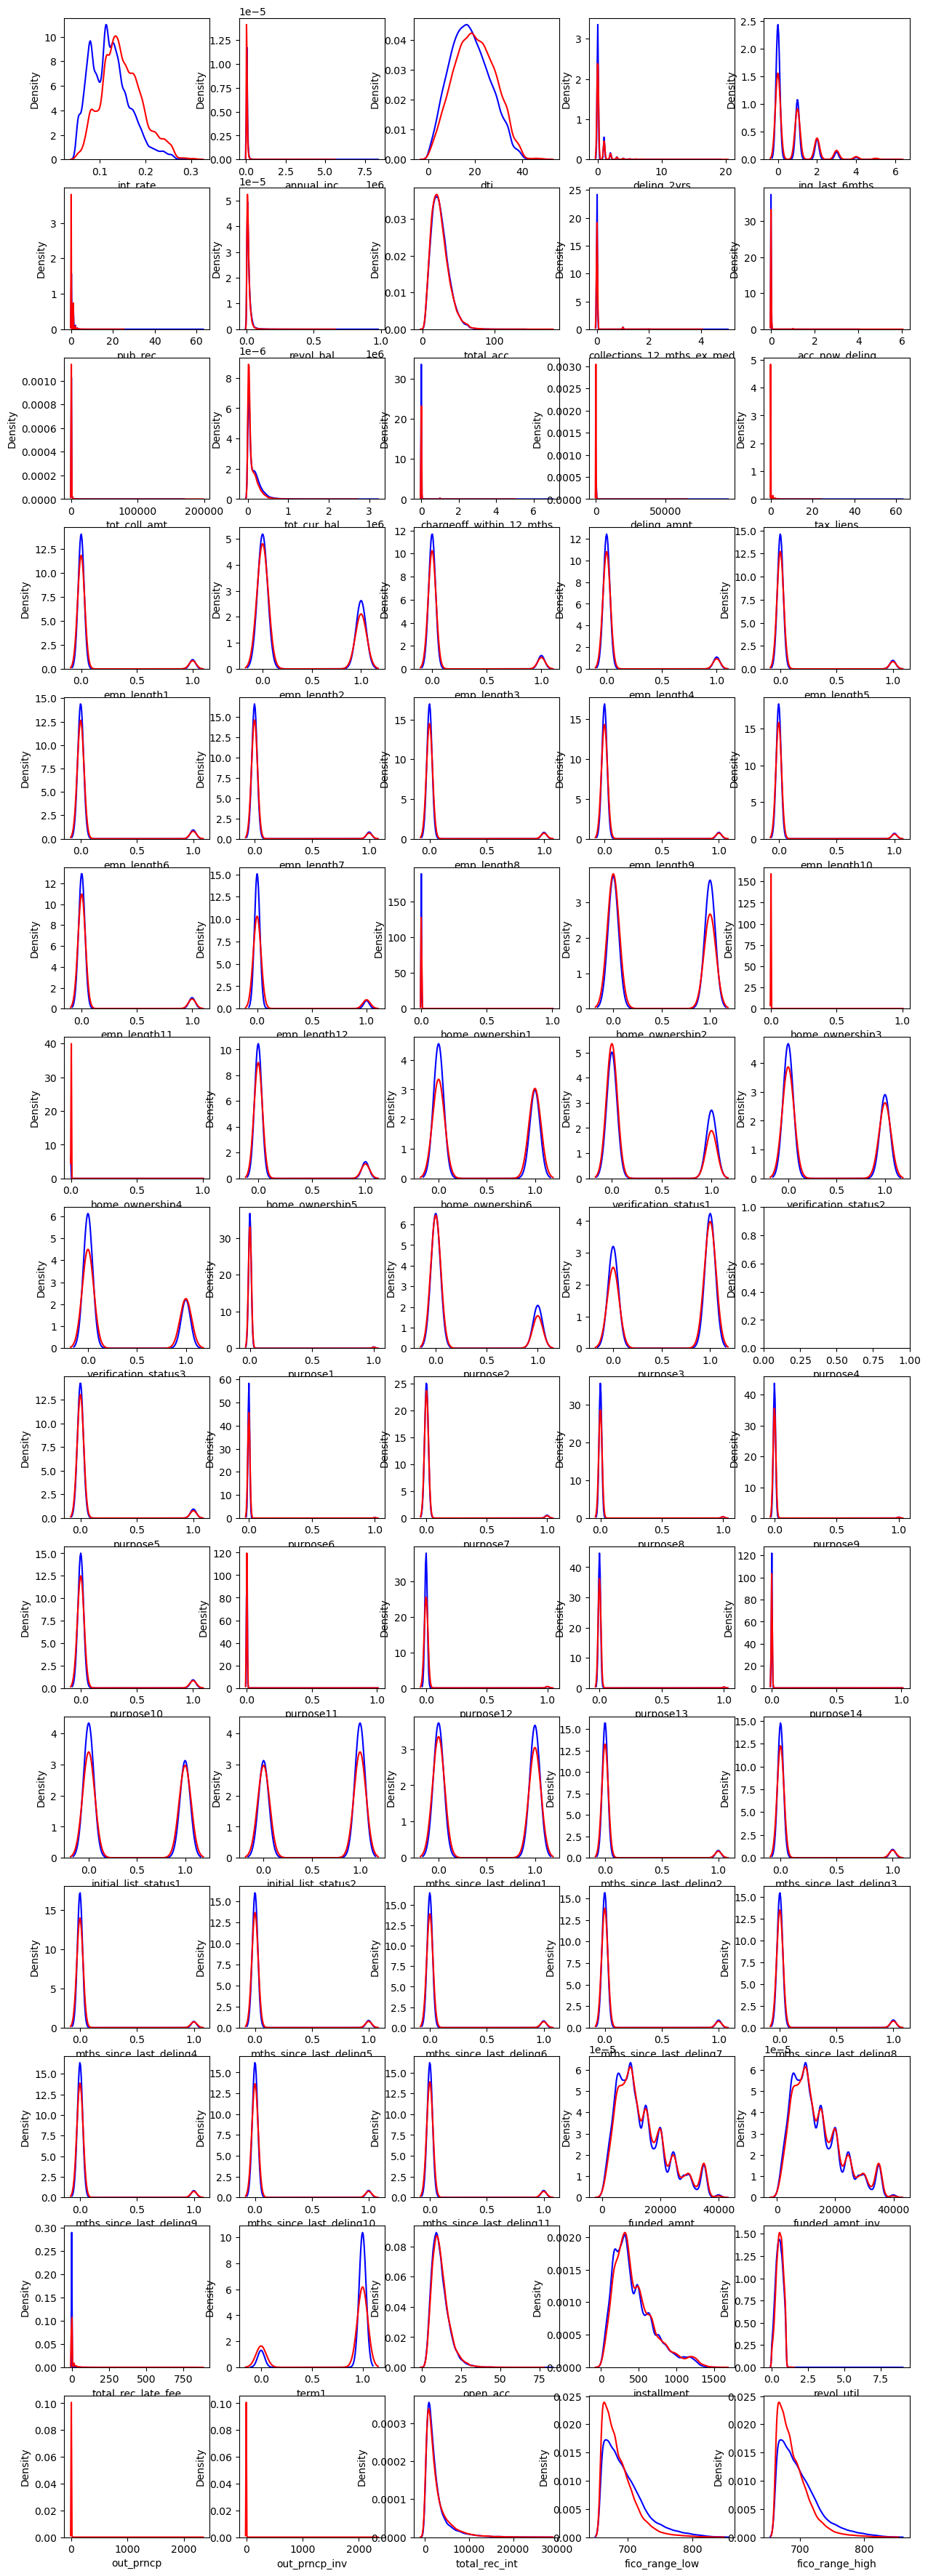

In [29]:
fig, axs = plt.subplots(15, 5, figsize=(15, 45), squeeze=False)

for i, ax in enumerate(axs.flatten()):
    depvar_false = train[train['depvar']==0].iloc[:,i]
    depvar_true = train[train['depvar']==1].iloc[:,i]
    sns.kdeplot(depvar_false, ax=ax, color='blue')
    sns.kdeplot(depvar_true, ax=ax, color='red')

<Axes: xlabel='depvar', ylabel='count'>

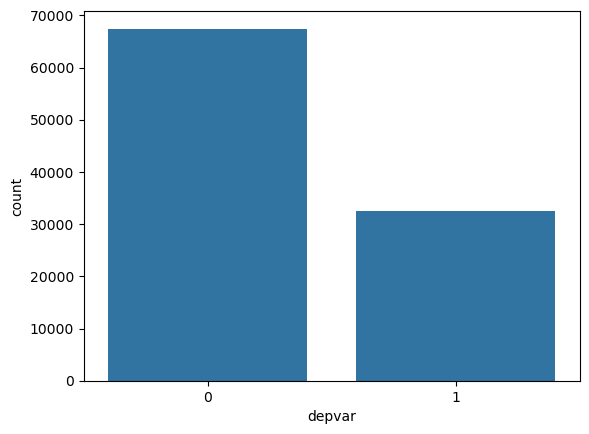

In [30]:
sns.countplot(x='depvar', data=train)

---

# modeling

---
## train

In [31]:
X = train.drop('depvar', axis=1)
y = train['depvar']

In [32]:
print(X.shape, y.shape)

(100000, 75) (100000,)


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(f'train shape : {X_train.shape}, {y_train.shape}')
print(f'train shape : {X_val.shape}, {y_val.shape}')

train shape : (80000, 75), (80000,)
train shape : (20000, 75), (20000,)


In [35]:
y_val.sum()/len(y_val)

0.32255

In [36]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = lr_model.predict(X_val)

In [38]:
def get_clf_eval(y_answer, y_pred):
    acc = metrics.accuracy_score(y_answer, y_pred)
    prec = metrics.precision_score(y_answer, y_pred)
    recall = metrics.recall_score(y_answer, y_pred)
    AUC = metrics.roc_auc_score(y_answer, y_pred)
    F1 = metrics.f1_score(y_answer, y_pred)
    confus_met = metrics.confusion_matrix(y_answer, y_pred)

    print("정확도 : {:.6f}".format(acc))
    print("정밀도 : {:.6f}".format(prec))
    print("재현율 : {:.6f}".format(recall))
    print("AUC : {:.6f}".format(AUC))
    print("F1 : {:.6f}".format(F1))
    print("confusion_matrix : {}".format(confus_met))

    sns.heatmap(confus_met, annot=True, fmt='d', cmap='YlGnBu')
    plt.xlabel('Prediction Labels')
    plt.xlabel('True Labels')


정확도 : 0.677650
정밀도 : 0.576923
재현율 : 0.002325
AUC : 0.500757
F1 : 0.004632
confusion_matrix : [[13538    11]
 [ 6436    15]]


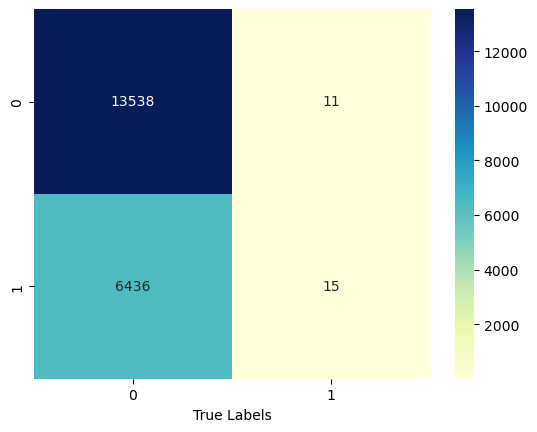

In [39]:
get_clf_eval(y_val, y_pred)

In [41]:
X_test = test.iloc[:, 1:]
test_pred = lr_model.predict(X_test)

In [45]:
submission = pd.read_csv('data/sample_submission.csv')
submission['answer'] = test_pred
submission.to_csv('submission.csv', index=False)

In [44]:
test_pred_proba = lr_model.predict_proba(test.iloc[:, 1:])
print(test_pred_proba)
print()

[[0.62459192 0.37540808]
 [0.63510339 0.36489661]
 [0.65412375 0.34587625]
 ...
 [0.68262598 0.31737402]
 [0.6935759  0.3064241 ]
 [0.74342617 0.25657383]]
